In [1]:
#Standard libraries for data analysis:----------------------
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

In [2]:
idvfc = pd.read_csv("idvfc_marzo2022_limpio.csv", encoding='latin1')


In [3]:
idvfc

,AÃ±o,Clave_Ent,Entidad,Tipo_de_delito,Subtipo_de_delito,Modalidad,Sexo,Rango_de_edad,Enero,Febrero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
0,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con arma de fuego,Mujer,Menores de edad (0-17),0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con arma blanca,Mujer,Menores de edad (0-17),0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,1,Aguascalientes,Homicidio,Homicidio doloso,Con otro elemento,Mujer,Menores de edad (0-17),0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,2015,1,Aguascalientes,Homicidio,Homicidio doloso,No especificado,Mujer,Menores de edad (0-17),0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,Aguascalientes,Lesiones,Lesiones dolosas,Con arma de fuego,Mujer,Menores de edad (0-17),0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,2022,32,Zacatecas,Feminicidio,Feminicidio,Con arma de fuego,Mujer,No especificado,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9980,2022,32,Zacatecas,Feminicidio,Feminicidio,Con arma blanca,Mujer,No especificado,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9981,2022,32,Zacatecas,Feminicidio,Feminicidio,Con otro elemento,Mujer,No especificado,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9982,2022,32,Zacatecas,Feminicidio,Feminicidio,No especificado,Mujer,No especificado,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
to_drop = ['Tipo_de_delito','Entidad','Sexo']
idvfc.drop(to_drop, inplace =True , axis=1)

In [5]:
idvfc

,AÃ±o,Clave_Ent,Subtipo_de_delito,Modalidad,Rango_de_edad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
0,2015,1,Homicidio doloso,Con arma de fuego,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,1,Homicidio doloso,Con arma blanca,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,1,Homicidio doloso,Con otro elemento,Menores de edad (0-17),0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,2015,1,Homicidio doloso,No especificado,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,Lesiones dolosas,Con arma de fuego,Menores de edad (0-17),0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,2022,32,Feminicidio,Con arma de fuego,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9980,2022,32,Feminicidio,Con arma blanca,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9981,2022,32,Feminicidio,Con otro elemento,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9982,2022,32,Feminicidio,No especificado,No especificado,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
idvfc_dummies = pd.get_dummies(idvfc)
idvfc_dummies.head()

,AÃ±o,Clave_Ent,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,...,Subtipo_de_delito_Lesiones dolosas,Subtipo_de_delito_Rapto,Modalidad_Con arma blanca,Modalidad_Con arma de fuego,Modalidad_Con otro elemento,Modalidad_No especificado,Modalidad_Rapto,Rango_de_edad_Adultos (18 y mÃ¡s),Rango_de_edad_Menores de edad (0-17),Rango_de_edad_No especificado
0,2015,1,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,2015,1,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
2,2015,1,0,0,0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
3,2015,1,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
4,2015,1,0,0,0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0


In [8]:
# **1. Logistic Regression**

# We will use the data frame where we had created dummy variables
y = idvfc_dummies['Total'].values
X = idvfc_dummies.drop(columns = ['Total'])

In [9]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [10]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)


/Users/esthephanyayala/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediction accuary SVC 0.5330440587449933
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


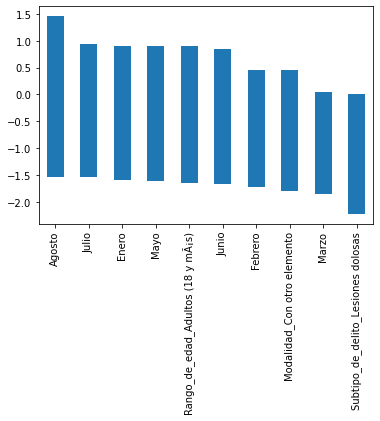

In [11]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print ("Prediction accuary SVC", metrics.accuracy_score(y_test, prediction_test))

# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print(weights.sort_values(ascending = False)[:10].plot(kind='bar'))

print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

Prediction accuary RF 0.5933900851276915


<AxesSubplot:>

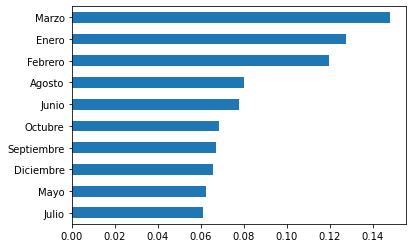

In [12]:
# **2. Random Forest**

from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print ("Prediction accuary RF", metrics.accuracy_score(y_test, prediction_test))

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

Confusion Matrix [[1060    0    0 ...    0    0    0]
 [ 211    0    0 ...    0    0    0]
 [ 111    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    1]
 [   0    0    0 ...    0    0    0]]
Prediction accuary RF 0.32198297446169255


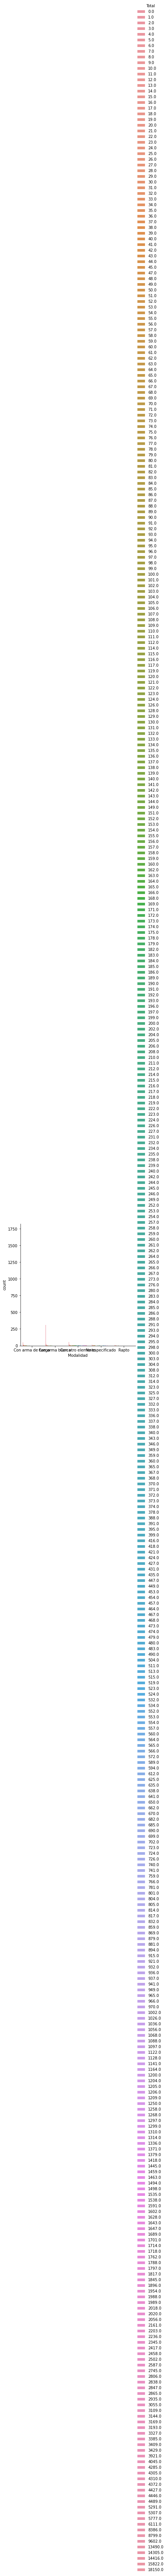

In [18]:
# **3. Support Vecor Machine (SVM)**

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print("Confusion Matrix", confusion_matrix(y_test,preds))  
print ("Prediction accuary RF", metrics.accuracy_score(y_test, prediction_test))

# Wth SVM I was able to increase the accuracy to upto 82%. However, we need to take a deeper look at the true positive and true negative rates, including the Area Under the Curve (AUC) for a better prediction. I will explore this soon. Stay Tuned!

ax1 = sns.catplot(x="Modalidad", kind="count", hue="Total", data=idvfc,
                  estimator=lambda x: sum(x==0)*100.0/len(x))
#ax1.yaxis.set_major_formatter(mtick.PercentFormatter())


In [19]:
# -----------------------------------------------------------------------
# **4. ADA Boost**

# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.542814221331998

In [ ]:
pip uninstall xgboost 
y

In [21]:

# -----------------------------------------------------------------------
# **5. XG Boost**

from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

# Interestingly with XG Boost I was able to increase the accuracy on 
# test data to almost 83%. Clearly, XG Boost is a winner among all other 
# techniques. XG Boost is a slow learning model and is based on the 
# concept of Boosting



ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408], got [0.0000e+00 1.0000e+00 2.0000e+00 3.0000e+00 4.0000e+00 5.0000e+00
 6.0000e+00 7.0000e+00 8.0000e+00 9.0000e+00 1.0000e+01 1.1000e+01
 1.2000e+01 1.3000e+01 1.4000e+01 1.5000e+01 1.6000e+01 1.7000e+01
 1.8000e+01 1.9000e+01 2.0000e+01 2.1000e+01 2.2000e+01 2.3000e+01
 2.4000e+01 2.5000e+01 2.6000e+01 2.7000e+01 2.8000e+01 2.9000e+01
 3.0000e+01 3.1000e+01 3.2000e+01 3.3000e+01 3.4000e+01 3.5000e+01
 3.6000e+01 3.7000e+01 3.8000e+01 3.9000e+01 4.0000e+01 4.1000e+01
 4.2000e+01 4.3000e+01 4.4000e+01 4.5000e+01 4.7000e+01 4.8000e+01
 4.9000e+01 5.0000e+01 5.1000e+01 5.2000e+01 5.3000e+01 5.4000e+01
 5.5000e+01 5.6000e+01 5.7000e+01 5.8000e+01 5.9000e+01 6.0000e+01
 6.1000e+01 6.2000e+01 6.3000e+01 6.4000e+01 6.5000e+01 6.6000e+01
 6.7000e+01 6.8000e+01 6.9000e+01 7.0000e+01 7.1000e+01 7.2000e+01
 7.3000e+01 7.4000e+01 7.5000e+01 7.6000e+01 7.7000e+01 7.8000e+01
 7.9000e+01 8.0000e+01 8.1000e+01 8.2000e+01 8.3000e+01 8.4000e+01
 8.5000e+01 8.6000e+01 8.7000e+01 8.8000e+01 8.9000e+01 9.0000e+01
 9.1000e+01 9.2000e+01 9.3000e+01 9.4000e+01 9.5000e+01 9.6000e+01
 9.7000e+01 9.8000e+01 9.9000e+01 1.0000e+02 1.0100e+02 1.0200e+02
 1.0300e+02 1.0400e+02 1.0500e+02 1.0600e+02 1.0700e+02 1.0800e+02
 1.0900e+02 1.1100e+02 1.1200e+02 1.1400e+02 1.1500e+02 1.1600e+02
 1.1700e+02 1.1900e+02 1.2000e+02 1.2100e+02 1.2200e+02 1.2300e+02
 1.2400e+02 1.2600e+02 1.2800e+02 1.2900e+02 1.3000e+02 1.3100e+02
 1.3200e+02 1.3300e+02 1.3400e+02 1.3500e+02 1.3600e+02 1.3700e+02
 1.3800e+02 1.3900e+02 1.4000e+02 1.4100e+02 1.4200e+02 1.4300e+02
 1.4400e+02 1.4900e+02 1.5100e+02 1.5200e+02 1.5300e+02 1.5400e+02
 1.5500e+02 1.5700e+02 1.5800e+02 1.5900e+02 1.6000e+02 1.6200e+02
 1.6300e+02 1.6400e+02 1.6500e+02 1.6600e+02 1.6800e+02 1.6900e+02
 1.7100e+02 1.7200e+02 1.7300e+02 1.7400e+02 1.7500e+02 1.7800e+02
 1.7900e+02 1.8200e+02 1.8300e+02 1.8400e+02 1.8500e+02 1.8600e+02
 1.8900e+02 1.9000e+02 1.9100e+02 1.9200e+02 1.9300e+02 1.9600e+02
 1.9700e+02 1.9900e+02 2.0000e+02 2.0200e+02 2.0400e+02 2.0500e+02
 2.0600e+02 2.1000e+02 2.1100e+02 2.1200e+02 2.1400e+02 2.1500e+02
 2.1600e+02 2.1700e+02 2.1800e+02 2.2200e+02 2.2300e+02 2.2400e+02
 2.2600e+02 2.2700e+02 2.3100e+02 2.3200e+02 2.3400e+02 2.3500e+02
 2.3800e+02 2.3900e+02 2.4000e+02 2.4200e+02 2.4400e+02 2.4500e+02
 2.4600e+02 2.5200e+02 2.5300e+02 2.5400e+02 2.5800e+02 2.5900e+02
 2.6000e+02 2.6100e+02 2.6200e+02 2.6400e+02 2.6500e+02 2.6600e+02
 2.6700e+02 2.7300e+02 2.7600e+02 2.8000e+02 2.8300e+02 2.8400e+02
 2.8500e+02 2.8600e+02 2.8800e+02 2.9100e+02 2.9300e+02 2.9400e+02
 2.9500e+02 2.9800e+02 3.0000e+02 3.0300e+02 3.0400e+02 3.0800e+02
 3.1200e+02 3.1400e+02 3.2300e+02 3.2500e+02 3.2700e+02 3.3200e+02
 3.3300e+02 3.3600e+02 3.3700e+02 3.3800e+02 3.4600e+02 3.4900e+02
 3.5900e+02 3.6500e+02 3.6700e+02 3.6800e+02 3.7000e+02 3.7100e+02
 3.7200e+02 3.7300e+02 3.7400e+02 3.7800e+02 3.9100e+02 3.9500e+02
 4.1600e+02 4.1800e+02 4.2100e+02 4.2400e+02 4.2700e+02 4.3100e+02
 4.3500e+02 4.4700e+02 4.4900e+02 4.5300e+02 4.5700e+02 4.6400e+02
 4.6700e+02 4.6800e+02 4.7300e+02 4.7400e+02 4.7900e+02 4.8000e+02
 5.1100e+02 5.1300e+02 5.1500e+02 5.1900e+02 5.2300e+02 5.2400e+02
 5.3200e+02 5.3400e+02 5.5200e+02 5.5300e+02 5.5400e+02 5.5700e+02
 5.6000e+02 5.6400e+02 5.6500e+02 5.6600e+02 5.7200e+02 5.8900e+02
 5.9400e+02 6.1200e+02 6.2500e+02 6.3500e+02 6.3800e+02 6.5000e+02
 6.6200e+02 6.7000e+02 6.8200e+02 6.8500e+02 6.9000e+02 6.9900e+02
 7.0200e+02 7.2300e+02 7.2400e+02 7.2600e+02 7.4000e+02 7.4100e+02
 7.5900e+02 7.8100e+02 8.0100e+02 8.0400e+02 8.0500e+02 8.1400e+02
 8.1700e+02 8.3200e+02 8.5900e+02 8.7900e+02 8.8100e+02 8.9400e+02
 9.1500e+02 9.2100e+02 9.3700e+02 9.4100e+02 9.6600e+02 1.0020e+03
 1.0260e+03 1.0360e+03 1.0560e+03 1.0680e+03 1.0880e+03 1.0970e+03
 1.1220e+03 1.1280e+03 1.1410e+03 1.2000e+03 1.2060e+03 1.2090e+03
 1.2580e+03 1.2680e+03 1.2970e+03 1.2990e+03 1.3100e+03 1.3360e+03
 1.3710e+03 1.3790e+03 1.4450e+03 1.4590e+03 1.4940e+03 1.4980e+03
 1.5350e+03 1.5910e+03 1.6020e+03 1.6280e+03 1.6430e+03 1.7010e+03
 1.7140e+03 1.7180e+03 1.7620e+03 1.7880e+03 1.7970e+03 1.8170e+03
 1.8450e+03 1.8960e+03 1.9540e+03 1.9880e+03 1.9890e+03 2.0180e+03
 2.0200e+03 2.0560e+03 2.1610e+03 2.2030e+03 2.2360e+03 2.4170e+03
 2.4580e+03 2.5870e+03 2.7450e+03 2.8060e+03 2.8380e+03 2.8470e+03
 2.8650e+03 2.9350e+03 3.0550e+03 3.1090e+03 3.1440e+03 3.1690e+03
 3.1930e+03 3.3270e+03 3.3850e+03 3.4090e+03 3.4290e+03 3.9210e+03
 4.2850e+03 4.3100e+03 4.3720e+03 4.4270e+03 4.4890e+03 5.2910e+03
 5.7770e+03 8.3860e+03 1.3490e+04 1.4305e+04 1.4416e+04 1.5822e+04
 1.8150e+04]